# (1) Fit the data below to a straight line using the function $LineFitWt(x, y, dy)$ introduced in the program betaDecay.py on page $190$. Plot the data and the fit so that you obtain a figure like the one below, which includes the best fit (solid line) along with two fits shown with dashed lines. One has a slope equal to the fitted slope plus the slope uncertainty obtained from the fit. The other has a slope equal to the fitted slope minus the slope uncertainty obtained from the fit. These are matched with the fitted $y$- intercept minus or plus its fitted uncertainty.

Text(0, 0.5, 'Force(N)')

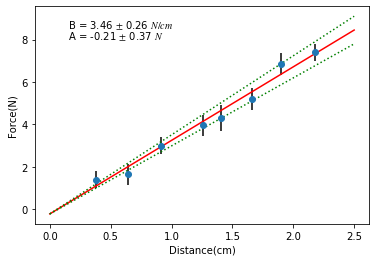

In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('mathtext', fontset='stix')


def LineFitWt(x, y, dy):
    
    invdy2 = 1./dy**2
    xhat = (x*invdy2).sum()/invdy2.sum()
    yhat = (y*invdy2).sum()/invdy2.sum()
    
    b = ((x - xhat)*y*invdy2).sum()/((x - xhat)*x*invdy2).sum()
    a = yhat - b*xhat
    
    incb = 1./((x - xhat)*x*invdy2).sum()
    inca = incb*((x**2)*invdy2).sum()/invdy2.sum()

    return a, b, np.sqrt(inca), np.sqrt(incb)

d = np.array([0.38, 0.64, 0.91, 1.26, 1.41, 1.66, 1.90, 2.18])
f = np.array([1.4, 1.65, 3.0, 3.95, 4.3, 5.20, 6.85, 7.4])
df = np.array([0.4, 0.5, 0.4, 0.5, 0.6, 0.5, 0.5, 0.4])


A, B, dA, dB = LineFitWt(d, f, df)

x = np.linspace(0, 2.5, 100)
y = A + B*x

y1 = A + (B + dB)*x
y2 = A + (B - dB)*x


fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y, linestyle='-', color='red')
ax.plot(x, y1, linestyle=':', color='green')
ax.plot(x, y2, linestyle=':', color='green')
ax.errorbar(d, f, yerr = df, fmt='oC0' ,ecolor='black')
ax.text(0.1, 0.90 , r'B = {0:0.2f} $\pm$ {1:0.2f} $N/cm$'.format(B, dB), transform=ax.transAxes)
ax.text(0.1, 0.85, r'A = {0:0.2f} $\pm$ {1:0.2f} $N$'.format(A, dA), transform=ax.transAxes)
ax.set_xlabel('Distance(cm)')
ax.set_ylabel('Force(N)')

# (2) When a voltage source is connected across a resistor and inductor in series, the voltage across the inductor $V_{i}(t)$ is predicted to obey the equation


$V(t) = V_{0}e^{-\Gamma t}$

# where $t$ is the time and the decay rate $\Gamma = R/L$ is the ratio of the resistance $R$ to the inductance $L$ of the circuit. In this problem, you are to write a Python routine that fits the above equation to the data below for the voltage measured across an inductor after it is connected in series with a resistor to a voltage source. Following the example in the text, linearize $Eq. (8.17)$ and use a linear fitting routine, either the one you wrote from the previous chapter or one from NumPy or SciPy.

## (a) Find the best values of $\Gamma$ and $V_{0}$ and the uncertainties in their values $\sigma_{\Gamma}$ and $\sigma_{V_{0}}$.


Text(0.5, 0.85, '$\\Gamma$ = 0.0120 $\\pm$ 0.0002')

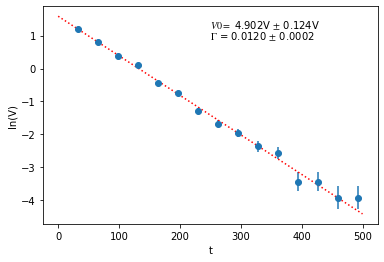

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('mathtext', fontset='stix')

def LineFitWt(x, y, dy):
    invdy2 = 1./dy**2
    xhat = (x*invdy2).sum()/invdy2.sum()
    yhat = (y*invdy2).sum()/invdy2.sum()
    
    b = ((x - xhat)*y*invdy2).sum()/((x - xhat)*x*invdy2).sum()
    a = yhat - b*xhat
    
    incb = 1./((x - xhat)*x*invdy2).sum()
    inca = incb*((x**2)*invdy2).sum()/invdy2.sum()

    return a, b, np.sqrt(inca), np.sqrt(incb)

def redchisq(x, y, dy, A, B):
    chisq = (((y-A-B*x)/dy)**2).sum()
    return chisq/(x.size - 2)


t, V, dV = np.loadtxt('dataexercise8_2.txt', skiprows=6, unpack=True) #We have to take out the first element


y = np.log(V)
x = t
dy = dV/V

A, B, incA, incB = LineFitWt(x, y, dy)

V0 = np.exp(A)
Gamma = -B

dV0 = V0*incA


X = np.linspace(0, 500, 100)

Y = A + B*X


fig, ax = plt.subplots()
ax.errorbar(x, y, dy, fmt='oC0')
ax.plot(X, Y, linestyle=':', color='red')
ax.set_xlabel('t')
ax.set_ylabel('In(V)')
ax.text(0.5, 0.9, r'$V0=$ {0:0.3f}V $\pm$ {1:0.3f}V '.format(V0, dV0), transform=ax.transAxes)
ax.text(0.5, 0.85, r'$\Gamma$ = {0:0.4f} $\pm$ {1:0.4f}'.format(Gamma, incB), transform=ax.transAxes)

    

## (b) Find the value of $\chi_{r}^2$ for your fit. Does it make sense?

Text(0.5, 0.8, '$\\chi^2$ = 0.8658')

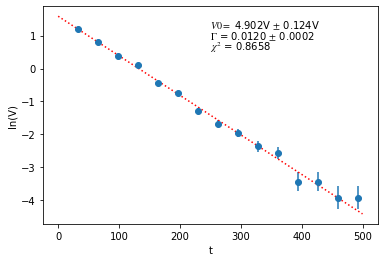

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('mathtext', fontset='stix')

def LineFitWt(x, y, dy):
    invdy2 = 1./dy**2
    xhat = (x*invdy2).sum()/invdy2.sum()
    yhat = (y*invdy2).sum()/invdy2.sum()
    
    b = ((x - xhat)*y*invdy2).sum()/((x - xhat)*x*invdy2).sum()
    a = yhat - b*xhat
    
    incb = 1./((x - xhat)*x*invdy2).sum()
    inca = incb*((x**2)*invdy2).sum()/invdy2.sum()

    return a, b, np.sqrt(inca), np.sqrt(incb)

def redchisq(x, y, dy, A, B):
    chisq = (((y-A-B*x)/dy)**2).sum()
    return chisq/(x.size - 2)


t, V, dV = np.loadtxt('dataexercise8_2.txt', skiprows=6, unpack=True) #We have to take out the first element


y = np.log(V)
x = t
dy = dV/V

A, B, incA, incB = LineFitWt(x, y, dy)

V0 = np.exp(A)
Gamma = -B

dV0 = V0*incA


chiq = redchisq(x, y, dy, A, B)

X = np.linspace(0, 500, 100)

Y = A + B*X


fig, ax = plt.subplots()
ax.errorbar(x, y, dy, fmt='oC0')
ax.plot(X, Y, linestyle=':', color='red')
ax.set_xlabel('t')
ax.set_ylabel('In(V)')
ax.text(0.5, 0.9, r'$V0=$ {0:0.3f}V $\pm$ {1:0.3f}V '.format(V0, dV0), transform=ax.transAxes)
ax.text(0.5, 0.85, r'$\Gamma$ = {0:0.4f} $\pm$ {1:0.4f}'.format(Gamma, incB), transform=ax.transAxes)
ax.text(0.5, 0.80, r'$\chi^2$ = {0:0.4f}'.format(chiq), transform=ax.transAxes)



 ## (c) Make a semi-log plot of the data using symbols with error bars (no line) and of the fit (line only). The fit should appear as a straight line that goes through the data points.


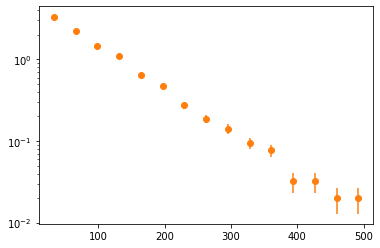

In [156]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('mathtext', fontset='stix')

def LineFitWt(x, y, dy):
    invdy2 = 1./dy**2
    xhat = (x*invdy2).sum()/invdy2.sum()
    yhat = (y*invdy2).sum()/invdy2.sum()
    
    b = ((x - xhat)*y*invdy2).sum()/((x - xhat)*x*invdy2).sum()
    a = yhat - b*xhat
    
    incb = 1./((x - xhat)*x*invdy2).sum()
    inca = incb*((x**2)*invdy2).sum()/invdy2.sum()

    return a, b, np.sqrt(inca), np.sqrt(incb)

def redchisq(x, y, dy, A, B):
    chisq = (((y-A-B*x)/dy)**2).sum()
    return chisq/(x.size - 2)


t, V, dV = np.loadtxt('dataexercise8_2.txt', skiprows=6, unpack=True) #We have to take out the first element


y = np.log(V)
x = t
dy = dV/V

Vlog = np.log(V)

A, B, incA, incB = LineFitWt(y, x, dV)


V0 = np.exp(A)
Gamma = B

dV0 = V0*incA


chiq = redchisq(x, y, dy, A, B)

X = np.linspace(0, 500, 1000)

fig, ax = plt.subplots()
ax.errorbar(t, V, dV, fmt='oC1')
ax.set_yscale("log", nonposy='clip')
#ax.plot(X, Y , linestyle=':', color='red')
#ax.text(0.5, 0.9, r'$V0=$ {0:0.3f}V $\pm$ {1:0.3f}V '.format(V0, dV0), transform=ax.transAxes)
#ax.set_xlabel('t')
#ax.set_ylabel('In(V)')
#ax.text(0.5, 0.85, r'$\Gamma$ = {0:0.4f} $\pm$ {1:0.4f}'.format(B, incB), transform=ax.transAxes)
#ax.text(0.5, 0.80, r'$\chi^2$ = {0:0.4f}'.format(chiq), transform=ax.transAxes)




# (3) Fit the data of the previous exercise to fit $Eq.(8.17)$ using the SciPy function $\textit{scipy.optimize.curve_fit}$. Plot the data as symbols and the fit as a line on linear and on semilogarithmic axes in two separate plots in the same figure window. Compare your results to those of the previous exercise.

Text(300.5, -0.5, 'V0 = 2.97 $\\pm$ 0.86')

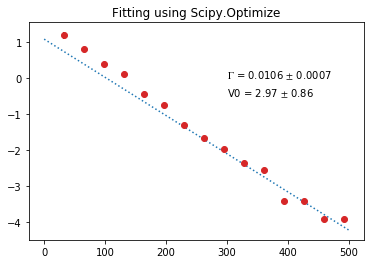

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


def LineFit(x, A, B):    
    return A + B*x

t, V, dV = np.loadtxt('dataexercise8_2.txt', skiprows=6, unpack=True)

A0, B0 = 1.609, 0.012

nparfit, incpar = scipy.optimize.curve_fit(LineFit, t, np.log(V), p0=[A0, B0], sigma=dV)

A, B = nparfit

da, db = [np.sqrt(incpar[j, j])
                  for j in range(nparfit.size)]


X = np.linspace(0., 500., 100)
Y = LineFit(X, A, B)

x = t
y = np.log(V)
V0 = np.exp(A)
dV0 = V0*da


fig, ax = plt.subplots()

ax.errorbar(x, y, yerr=dV, fmt='oC3', ecolor='black')
ax.plot(X, Y, linestyle=':')
ax.set_title('Fitting using Scipy.Optimize')
ax.text(300.5, 0.,'$\Gamma$ = {0:0.4f} $\pm$ {1:0.4f}'.format(-B, db))
ax.text(300.5, -0.5,'V0 = {0:0.2f} $\pm$ {1:0.2f}'.format(V0, dV0))







# (4) Small nanoparticles of soot suspended in water start to aggregate when salt is added. The average radius $r$ of the aggregates is predicted to grow as a power law in time $t$ according to the equation


$r = Kt^p$


# In general the power $p$ is not an integer, which means that $K$ has odd units that depend on the value of $p$. Taking the logarithm of this equation gives $ln r = p ln t + ln K$ . Thus, the data should fall on a straight line of slope $p$ if $lnr$ is plotted vs. $lnt$.


## (a) Plot the data below on a graph of $lnr$ vs. $lnt$ to see if the data fall approximately on a straight line.

Text(0, 0.5, '$In(r)$')

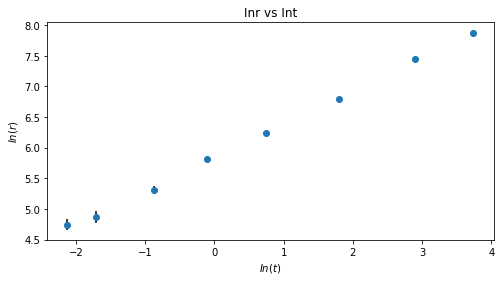

In [5]:
import numpy as np
import matplotlib.pyplot as plt


t, r, dr = np.loadtxt('dataexercise8_4.txt', skiprows=4, unpack=True)

fig, ax = plt.subplots(figsize=(8,4))

x = np.log(t)
y = np.log(r)

dy = (1./r)*dr

ax.errorbar(x, y, yerr=dy, ecolor='black', fmt='oC0')
ax.set_title('Inr vs Int')
ax.set_xlabel('$In(t)$')
ax.set_ylabel('$In(r)$')


## (b) Defining $y = lnr$ and $x = lnt$, use the linear fitting routine you wrote for the previous problem to fit the data and find the optimal values for the slope and y intercept, as well as their uncertainties. Use these fitted values to find the optimal values of the amplitude $K$ and the power $p$ in the fitting function $r = Kt^{p}$. What are the fitted values of $K$ and $p$ and their uncertainties? What is the value of $\chi^2$? Does a power law provide an adequate model for the data?


0.6250756540064019


Text(0, 0.5, '$In(r)$')

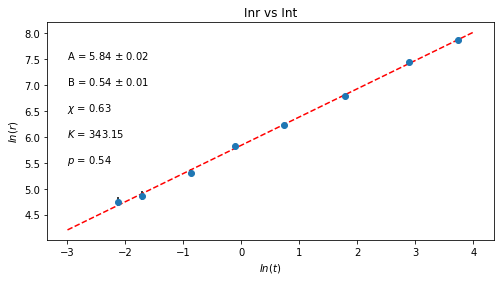

In [18]:
import numpy as np
import matplotlib.pyplot as plt




def LineFitWt(x, y, dy):
    
    invdy2 = 1./dy**2
    xhat = (x*invdy2).sum()/invdy2.sum()
    yhat = (y*invdy2).sum()/invdy2.sum()
    
    b = ((x - xhat)*y*invdy2).sum()/((x - xhat)*x*invdy2).sum()
    a = yhat - b*xhat
    
    incb = 1./((x - xhat)*x*invdy2).sum()
    inca = incb*((x**2)*invdy2).sum()/invdy2.sum()

    return a, b, np.sqrt(inca), np.sqrt(incb)

#Tenemos la relación Inr = InK + pInt


t, r, dr = np.loadtxt('dataexercise8_4.txt', skiprows=4, unpack=True)


def redchisq(x, y, dy, A, B):
    chisq = (((y-A-B*x)/dy)**2).sum()
    return chisq/(x.size - 2)


x = np.log(t)
y = np.log(r)

dy = (1./r)*dr


A, B, dA, dB = LineFitWt(x, y, dy)

chiq = redchisq(x, y , dy, A, B)


X = np.linspace(-3., 4., 100)

Y = A + B*X


K = np.exp(A)
p = B

print(chiq)

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(X, Y, linestyle='--', color='red')
ax.errorbar(x, y, yerr=dy, ecolor='black', fmt='oC0')
ax.text(-3., 7.5, 'A = {0:0.2f} $\pm$ {1:0.2f}'.format(A, dA))
ax.text(-3., 7.0, 'B = {0:0.2f} $\pm$ {1:0.2f}'.format(B, dB))
ax.text(-3., 6.5, '$\chi$ = {0:0.2f} '.format(chiq))
ax.text(-3., 6., '$K$ = {0:0.2f} '.format(K))
ax.text(-3., 5.5, '$p$ = {0:0.2f} '.format(p))
ax.set_title('Inr vs Int')
ax.set_xlabel('$In(t)$')
ax.set_ylabel('$In(r)$')


#Does not adequate




# (5) Fit the data of the previous exercise to fit $Eq.(8.18)$ using the SciPy function $\textit{scipy.optimize.curve_fit}$. Plot the data as symbols and the fit as a line on linear and on log-log axes in two separate plots in the same figure window. Compare your results to those of the previous exercise.

Text(-3.0, 5.5, '$p$ = 0.544 ')

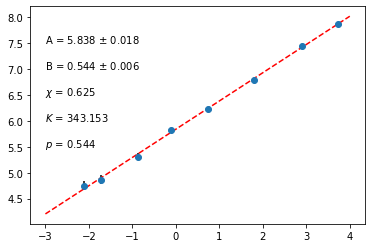

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


def Line(x, A, B):
    return A + B*x


def redchisq(x, y, dy, A, B):
    chisq = (((y-A-B*x)/dy)**2).sum()
    return chisq/(x.size - 2)


t, r, dr = np.loadtxt('dataexercise8_4.txt', skiprows=4, unpack=True)

y = np.log(r)
x = np.log(t)

dy = (1./r)*dr


K0, po = 5.88 , 0.53 


nparfit, incpar = scipy.optimize.curve_fit(Line, x, y, p0=[K0, po], sigma=dy)

A, B = nparfit


dA, dB = [np.sqrt(incpar[j, j])
                  for j in range(nparfit.size)]

X = np.linspace(-3., 4., 100)
Y = Line(X, A, B)
chiqR = redchisq(x, y, dy, A, B)

K = np.exp(A)
p = B

fig, ax = plt.subplots(figsize=(6, 4))

ax.errorbar(x, y, yerr=dy, ecolor='black', fmt='oC0')
ax.plot(X, Y, linestyle='--', color='red')
ax.text(-3., 7.5, 'A = {0:0.3f} $\pm$ {1:0.3f}'.format(A, dA))
ax.text(-3., 7.0, 'B = {0:0.3f} $\pm$ {1:0.3f}'.format(B, dB))
ax.text(-3., 6.5, '$\chi$ = {0:0.3f} '.format(chiqR))
ax.text(-3., 6., '$K$ = {0:0.3f} '.format(K))
ax.text(-3., 5.5, '$p$ = {0:0.3f} '.format(p))





# (6) In this problem you explore using a nonlinear least square fitting routine to fit the data shown in the figure on the next page. The data, including the uncertainties in the $y$ values, are provided in the table at the end of this problem. Your task is to fit the function

$d(t) = A(1 + Bcos\omega t)e^{-t^{2}/2\tau^{2}} + C$


# to the data, where the fitting parameters are $A,B,C, \omega$, and $\tau$.


## (a) Write a Python program that $(i)$ reads the data in from a data file, $(ii)$ defines a function $oscDecay(t, A, B, C, tau, omega)$ for the function $d(t)$ above, and $(iii)$ produces a plot of the data and the function $d(t)$. Choose the fitting parameters $A, B, C, tau$, and $omega$ to produce an approximate fit “by eye” to the data. You should be able estimate reasonable values for these parameters just by looking at the data and thinking about the behavior of $d(t)$. For example, $d(0) = A(1 + B) + C$ while $d(\infty) = C$. What parameter in $d(t)$ controls the period of the peaks observed in the data? Use that information to estimate the value of that parameter.

<ErrorbarContainer object of 3 artists>

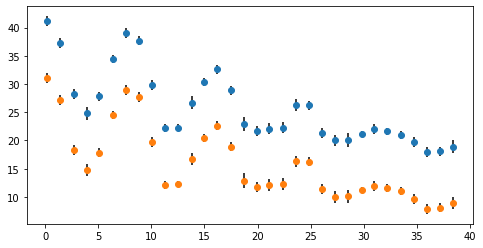

In [59]:
import numpy as np
import matplotlib.pyplot as plt


#(i) Import data

t, s, ds = np.loadtxt('dataexercise8_5.txt', skiprows=4, unpack=True)


#(ii) Function

def oscDecay(t, A, B, C, tau, omega):
    return A*(1 + B*np.cos(omega*t))*np.exp(-t**2/(2*tau**2)) + C

#(iii) Plot of the data

fig, ax = plt.subplots(figsize=(8, 4))

ax.errorbar(t, s, yerr=ds, ecolor='black', fmt='oC0')
ax.errorbar(t, s - 10, yerr=ds, ecolor='black', fmt='oC1')



#A0, B0, C0, tau0, omega0 = 10.0, np.pi/4


